# The Movies Dataset 

<h3>A Regression approach for predicting the revenue of a movie</h3>

<h3>Problem Statement:</h3>    
The dataset contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.We can predict the revenue and/or movie success of the movie based on a certain metric.A regression model is used to predict movie revenues taking into account the following features:'popularity','runtime' and 'vote_count'. This model will predict the movie revenue based on the given features.    

Link for the dataset:https://www.kaggle.com/rounakbanik/the-movies-dataset

<h3>Let's see what the dataset has to tell us</h3>

The dataset was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the MovieLens Latest Full Dataset comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the features that are available to us.

<h4>Features</h4>
1. adult: Indicates if the movie is X-Rated or Adult.
2. belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to
3. budget: The budget of the movie in dollars.
4. genres: A stringified list of dictionaries that list out all the genres associated with the movie.
5. homepage: The Official Homepage of the move.
6. id: The ID of the move.
7. imdb_id: The IMDB ID of the movie.
8. original_language: The language in which the movie was originally shot in.
9. original_title: The original title of the movie.
10. overview: A brief blurb of the movie.
11. popularity: The Popularity Score assigned by TMDB.
12. poster_path: The URL of the poster image.
13. production_companies: A stringified list of production companies involved with the making of the movie.
14. production_countries: A stringified list of countries where the movie was shot/produced in.
15. release_date: Theatrical Release Date of the movie.
16. revenue: The total revenue of the movie in dollars.
17. runtime: The runtime of the movie in minutes.
18. spoken_languages: A stringified list of spoken languages in the film.
19. status: The status of the movie (Released, To Be Released, Announced, etc.)
20. tagline: The tagline of the movie.
21. title: The Official Title of the movie.
22. video: Indicates if there is a video present of the movie with TMDB.
23. vote_average: The average rating of the movie.
24. vote_count: The number of votes by users, as counted by TMDB.

<h3>What're we going to do with this dataset</h3>

Some basic things to do with this dataset: Predicting movie revenue and/or movie success based on a certain metric.Also a recommendation system can be built around this dataset.

So,let us build a <b>Regressor</b> that can,to a certain degree,predict the revenue of a particular movie.We are going to implement this in tensorflow using Keras API.We are using regression model because we are trying to predict the output of a continuous value,i.e,the revenue.   

<h2>LET'S START !!!</h2>

<h3>The first thing we are going to do is importing certain libraries and loading our dataset</h3>

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import seaborn as sns

In [2]:
data = pd.read_csv('movies_metadata.csv',low_memory=False)
data = data.drop(['belongs_to_collection', 'homepage','imdb_id','original_title',
                 'overview','poster_path','tagline','title','spoken_languages','release_date','budget'], axis=1)

data

,adult,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,status,video,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Released,False,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Released,False,6.9,2413.0
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Released,False,6.5,92.0
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Released,False,6.1,34.0
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Released,False,5.7,173.0
5,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,Released,False,7.7,1886.0
6,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,en,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",0.0,127.0,Released,False,6.2,141.0
7,False,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,en,2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,97.0,Released,False,5.4,45.0
8,False,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,Released,False,5.5,174.0
9,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",352194034.0,130.0,Released,False,6.6,1194.0


<h3>We see a lot of zeros in revenue column.</h3>

<h3>Hmm..that's too bad! :(</h3>

<h3>Since our dataset is big,let's eliminate the coresponding rows which has zero in revenue column.We are still left with a sufficient amount of data</h3> 

In [3]:
data = data[data.revenue != 0]
data.index = range(len(data))
data.head()

,adult,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,status,video,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Released,False,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Released,False,6.9,2413.0
2,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Released,False,6.1,34.0
3,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Released,False,5.7,173.0
4,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,Released,False,7.7,1886.0


In [4]:
x = data

<h3>Now let's convert the json data in columns 'genres','production_companies' and 'production_countries' into a meaningful list and concatenate with the dataset.Also we should drop the json data columns</h3> 

In [5]:
genres = []

for i in x['genres']:
    a = ast.literal_eval(i)
    for g in a:
        genres.append(g['name'])
genres = set(genres)

In [6]:
partgenres = []
for i in x['genres']:
    a = ast.literal_eval(i)
    z = []
    for g in a:
        z.append(g['name'])
    partgenres.append([z])

partgenres = np.array(partgenres)
partgenres = pd.DataFrame(partgenres, columns=['genreset'])
x = pd.concat([x,partgenres],axis=1)
x.head(5)

,adult,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,status,video,vote_average,vote_count,genreset
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Released,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Released,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Released,False,6.1,34.0,"[Comedy, Drama, Romance]"
3,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Released,False,5.7,173.0,[Comedy]
4,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,Released,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]"


In [7]:
prod = []

for i in x['production_companies']:
    try:
        a = ast.literal_eval(i)
        for g in a:
            prod.append(g['name'])
    except:
        continue
prod = set(prod)

In [8]:
partprod = []
for i in x['production_companies']:
    try:
        a = ast.literal_eval(i)
        z = []
        for g in a:
            z.append(g['name'])
        partprod.append([z])
    except:
        continue

partprod = np.array(partprod)
partprod = pd.DataFrame(partprod, columns=['prod_comp'])
x = pd.concat([x,partprod],axis=1)
x.head(3)

,adult,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,status,video,vote_average,vote_count,genreset,prod_comp
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Released,False,7.7,5415.0,"[Animation, Comedy, Family]",[Pixar Animation Studios]
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Released,False,6.9,2413.0,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co..."
2,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Released,False,6.1,34.0,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation]


In [9]:
prodcont = []

for i in x['production_countries']:
    try:
        a = ast.literal_eval(i)
        for g in a:
            prodcont.append(g['name'])
    except:
        continue
prodcont = set(prodcont)

In [10]:
partcnt = []
for i in x['production_countries']:
    try:
        a = ast.literal_eval(i)
        z = []
        for g in a:
            z.append(g['name'])
        partcnt.append([z])
    except:
        continue


In [11]:
partcnt = np.array(partcnt)
partcnt = pd.DataFrame(partcnt, columns=['prod_countries'])
x = pd.concat([x,partcnt],axis=1)
x.head()

,adult,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,status,video,vote_average,vote_count,genreset,prod_comp,prod_countries
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,Released,False,7.7,5415.0,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Released,False,6.9,2413.0,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Released,False,6.1,34.0,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America]
3,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Released,False,5.7,173.0,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America]
4,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,Released,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America]


In [12]:
x = x.drop(['genres', 'production_companies', 'production_countries'], axis=1)

In [13]:
x.head()

,adult,id,original_language,popularity,revenue,runtime,status,video,vote_average,vote_count,genreset,prod_comp,prod_countries
0,False,862,en,21.946943,373554033.0,81.0,Released,False,7.7,5415.0,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,False,8844,en,17.015539,262797249.0,104.0,Released,False,6.9,2413.0,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,31357,en,3.859495,81452156.0,127.0,Released,False,6.1,34.0,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America]
3,False,11862,en,8.387519,76578911.0,106.0,Released,False,5.7,173.0,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America]
4,False,949,en,17.924927,187436818.0,170.0,Released,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America]


<h3>Now we'll convert the data in some of the columns into an integer for simplicity</h3>

In [14]:
x['adult'] = x['adult']== True
x['adult'] = x['adult'].astype(int)

In [15]:
x['status_int'] = pd.Series(x['status'],dtype='category').cat.codes

In [16]:
x['video'] = x['video']== True
x['video'] = x['video'].astype(int)

In [17]:
x['lang_int'] = pd.Series(x['original_language'],dtype='category').cat.codes

<h3>We will now save the current dataset to a csv file and then continue working on it</h3>

In [18]:
x.to_csv('processed_imdb.csv')

In [19]:
x.head()

,adult,id,original_language,popularity,revenue,runtime,status,video,vote_average,vote_count,genreset,prod_comp,prod_countries,status_int,lang_int
0,0,862,en,21.946943,373554033.0,81.0,Released,0,7.7,5415.0,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],1,13
1,0,8844,en,17.015539,262797249.0,104.0,Released,0,6.9,2413.0,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1,13
2,0,31357,en,3.859495,81452156.0,127.0,Released,0,6.1,34.0,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],1,13
3,0,11862,en,8.387519,76578911.0,106.0,Released,0,5.7,173.0,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],1,13
4,0,949,en,17.924927,187436818.0,170.0,Released,0,7.7,1886.0,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1,13


In [20]:
video = pd.get_dummies(x['video'])
video = video.rename({False:'VFalse', True:'VTrue'},axis='columns')

In [21]:
lb = preprocessing.LabelEncoder()

In [22]:
lb.fit(list(genres))
len(lb.classes_)

32

<h3>Since there are a lot of genres, let us assign '1' if the movie belongs to that particular genre and '0' if it's not.</h3> 

In [23]:
g = []

for i in x['genreset'][:10]:
    op = [0 for i in range(32)]
    xi = lb.transform(i)
    for j in xi:
        op[j] = 1
    g.append(op)

        
    
g = pd.DataFrame(g, columns=lb.classes_)
g

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = data.drop(['genres','production_countries','production_companies'], axis=1)

In [25]:
x.head()

,adult,id,original_language,popularity,revenue,runtime,status,video,vote_average,vote_count,genreset,prod_comp,prod_countries,status_int,lang_int
0,0,862,en,21.946943,373554033.0,81.0,Released,0,7.7,5415.0,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],1,13
1,0,8844,en,17.015539,262797249.0,104.0,Released,0,6.9,2413.0,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1,13
2,0,31357,en,3.859495,81452156.0,127.0,Released,0,6.1,34.0,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],1,13
3,0,11862,en,8.387519,76578911.0,106.0,Released,0,5.7,173.0,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],1,13
4,0,949,en,17.924927,187436818.0,170.0,Released,0,7.7,1886.0,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1,13


<h2>Building a model to predict movie revenue</h2>

<h3>Before building a model let us take some features and normalize our data</h3>

In [26]:
data = pd.read_csv('processed_imdb.csv')
data = data.drop(['Unnamed: 0'],axis=1)
e = []
for i in data['popularity']:
    try:
        e.append(float(i))
    except:
        e.append(0.0)

data['popularity'] = e
r = data['revenue']
d = data.drop(['revenue'], axis=1)
data = pd.concat([d,r], axis=1)
data = data.dropna()
data.head()

,adult,id,original_language,popularity,runtime,status,video,vote_average,vote_count,genreset,prod_comp,prod_countries,status_int,lang_int,revenue
0,0,862,en,21.946943,81.0,Released,0,7.7,5415.0,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],1,13,373554033.0
1,0,8844,en,17.015539,104.0,Released,0,6.9,2413.0,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1,13,262797249.0
2,0,31357,en,3.859495,127.0,Released,0,6.1,34.0,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],1,13,81452156.0
3,0,11862,en,8.387519,106.0,Released,0,5.7,173.0,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1,13,76578911.0
4,0,949,en,17.924927,170.0,Released,0,7.7,1886.0,"['Action', 'Crime', 'Drama', 'Thriller']","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1,13,187436818.0


<h3>To select some best features to consider for our model,let us look at the Pearson correlation of the features with our target,i.e,the revenue.</h3>

<h3>We see that the features 'popularity','runtime' and 'vote_count' have high correlation with revenue when compared to other features.</h3>

<h5>Note: If you're getting confused with the table, observe only the last column.</h5>

In [27]:
data.corr('pearson')

,adult,popularity,runtime,video,vote_average,vote_count,status_int,lang_int,revenue
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,NaN,1.000000,0.112463,NaN,0.160890,0.497320,-0.002532,-0.097660,0.457799
runtime,NaN,0.112463,1.000000,NaN,0.296440,0.212070,-0.013529,0.109094,0.202650
video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,NaN,0.160890,0.296440,NaN,1.000000,0.270787,-0.044459,0.035854,0.149010
vote_count,NaN,0.497320,0.212070,NaN,0.270787,1.000000,-0.002133,-0.109384,0.781693
status_int,NaN,-0.002532,-0.013529,NaN,-0.044459,-0.002133,1.000000,0.020975,-0.001741
lang_int,NaN,-0.097660,0.109094,NaN,0.035854,-0.109384,0.020975,1.000000,-0.084242
revenue,NaN,0.457799,0.202650,NaN,0.149010,0.781693,-0.001741,-0.084242,1.000000


<h3>To understand in a better way how the input features are correlated with the revenue,a heatmap is shown below.The blocks which have more exposure represents high correlation and the least exposure block represents least correlation.</h3>

<h5>Note: There are some features with no blocks,which appears grey.This indicates that they can't be correlated to anything.</h5>

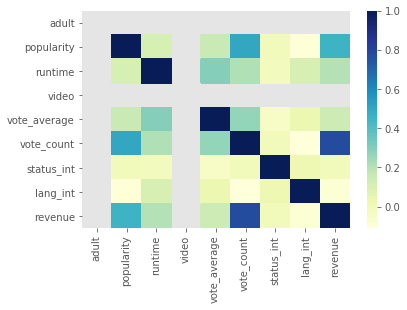

In [296]:
sns.heatmap(data.corr(), cmap = 'YlGnBu')

In [28]:
def normalize_data(col_name):
    X = data[col_name]
    X = (X-X.min())/(X.max()-X.min())
    return X

data['popularity'] = normalize_data('popularity')
data['vote_average'] = normalize_data('vote_average')
data['revenue'] = normalize_data('revenue')
data['runtime'] = normalize_data('runtime')
data['vote_count'] = normalize_data('vote_count')
data.head()

,adult,id,original_language,popularity,runtime,status,video,vote_average,vote_count,genreset,prod_comp,prod_countries,status_int,lang_int,revenue
0,0,862,en,0.040087,0.239645,Released,0,0.77,0.384725,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],1,13,0.133988
1,0,8844,en,0.031079,0.307692,Released,0,0.69,0.171439,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1,13,0.094261
2,0,31357,en,0.007049,0.375740,Released,0,0.61,0.002416,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],1,13,0.029216
3,0,11862,en,0.015320,0.313609,Released,0,0.57,0.012291,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1,13,0.027468
4,0,949,en,0.032740,0.502959,Released,0,0.77,0.133996,"['Action', 'Crime', 'Drama', 'Thriller']","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1,13,0.067231


<h3> We will take input features in variable 'X' and target in variable 'Y'.Let's split our dataset into train and test dataset.The split will be as follows - train dataset:75% and test dataset:25%</h3>

In [29]:
X = np.array(data[['popularity','vote_count','runtime']])
Y = np.array(data['revenue'])

In [294]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
xtrain.shape

(5915, 3)

<h3>Let us now build a Sequential Regression Model using 2 dense layers having 64 nodes each.The loss and Mean Absolute Error is calculated for the train data and validation data(which is considered during training).A graph between the train data loss and validation data loss is plotted.</h3>

In [278]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu,
                       input_shape=(3,)),
    keras.layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 64)                256       
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [279]:
history = model.fit(xtrain, ytrain, epochs=5,
                    validation_split=0.2, verbose=0)

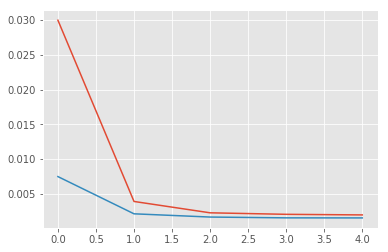

In [280]:
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])

<h3>Now our trained model is evaluated using our test data and the Mean Absolute Error is calculated.</h3>

In [281]:
[loss, mae] = model.evaluate(xtest, ytest, verbose=0)

In [282]:
# Mean Absolute Error

mae

0.013923098640157472



<h3>After training the model for different optimizers,we have got a mean absolute error of 0.013923098640157472.Mean Absolute Error (MAE) is a loss function used for regression models. MAE is the sum of absolute differences between our target and predicted variables.So this will measure the average magnitude of errors in a set of predictions.</h3>


<h3>Now let us test the predictions of our model</h3>

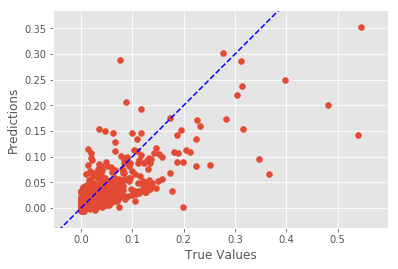

In [286]:
test_predictions = model.predict(xtest).flatten()

plt.scatter(ytest, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100],'b--')

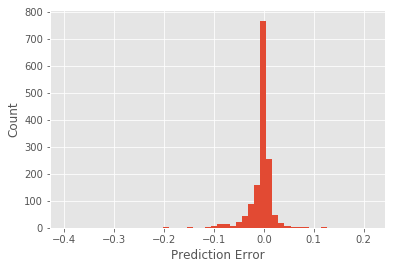

In [287]:
error = test_predictions - ytest
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

<h3>The first graph plots the predicted revenue values by our model vs the true values,i.e,the revenue actually made by the movie as given in our dataset.The red dots represent the original data and the blue line represents the fitted line defined by our model.</h3>

<h3>The second graphs plots the count,i.e,the number of test data vs the prediction error.We see that our model has predicted zero error for maximum number of test data.</h3>

<h2>Saving our model</h2>

In [285]:
model.save('MLF_capstone.h5')

<h2>Conclusion</h2>

After analyzing our predictions made by our model,we can say that our model worked well since it predicted revenue with minimal error.So,given a movie features our model will be able to predict the revenue made by that movie with a mean absolute error of approximately 0.014.